# Question 1

## (a) SIRD Model

**Updated list of variables in the model**

N: total population

S(t): number of people susceptible on day t

I(t): number of people infected on day t

R(t): number of people recovered on day t

D(t): number of people dead on day t

β: expected amount of people an infected person infects per day

D: number of days an infected person has and can spread the disease

γ: the proportion of infected recovering per day (γ = 1/D)

R₀: Basic reproduction number

μ: mortality rate

**ODE System**

$\frac{dS}{dt}= -β·I·\frac{S}{N}$

$\frac{dI}{dt}= β·I·\frac{S}{N} - γ·I -μ·I$

$\frac{dR}{dt} =γ·I$

$\frac{dD}{dt} =μ·I$

**Updated R₀ and Explanation**

$R^{SIRD}_{0}=\frac{β}{γ+μ}$

- The original R₀ = β ⋅ D =  β / γ


- Taking Death rate into consideration, everyday, there are 1/γ of infected people recovered and 1/μ R.I.P. Therefore, denominator should be (γ+μ)

$R^{SIRD}_{eff}=R_{0}*\frac{S_{t}}{N}$

**Plot**

In [5]:
import numpy as np
import pandas as pd
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

# Population size
N = 3000

# Initial conditions: 50 Infected, no Recovered or dead individuals
S0,I0, R0,D0 = N-50, 50, 0, 0 

beta = 0.35
gamma = 0.15
mu = 0.04
R_nought_sird = beta/(mu +gamma)



# A grid of time points (in days)
t = np.linspace(0, 365, 365)

# SIR model (coupled nonlinear system of ODEs)
def deriv_sird(y, t, N, beta, gamma,mu):
    S, I, R ,D = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mu*I
    dRdt = gamma * I
    dDdt = mu*I
    
    return dSdt, dIdt, dRdt,dDdt

# Initial conditions vector
y0 = S0, I0, R0, D0

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv_sird, y0, t, args=(N, beta, gamma,mu))
S, I, R, D = ret.T 

t_1 = 0
for time in range(0,len(S)):
    if R_nought_sird*S[time]/N <= 1: 
        t_1 = time
        break
print(f"R_eff_sir<=1 at t={t_1}d")

R_eff_sir<=1 at t=23d


In [8]:
def plot_sird(t, S, I, R, D):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S/N, 'b', alpha=0.7, linewidth=2, label='Susceptible%')
    ax.plot(t, I/N, 'r', alpha=0.7, linewidth=2, label='Infected%')
    ax.plot(t, R/N, 'g', alpha=0.7, linewidth=2, label='Recovered%')
    ax.plot(t, D/N, 'k', alpha=0.7, linewidth=2, label='Dead%')
    ax.plot(t, R_nought_sird*S/N, "gray", alpha=0.5, lw=2, label="R_effective")
    ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('% of Compartment / R_effective')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    
    #ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.title("SIRD Model")
    plt.show()

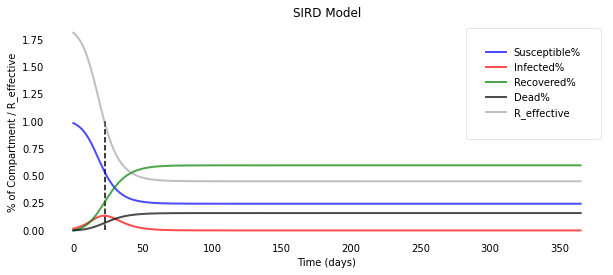

In [9]:
plot_sird(t, S, I, R, D)

## Influnce of $\mu$ and $R_{0}$ on Death

### **2.1.Change 𝜇 with other variables fixed**

It's given that μ ∈ \[0.4%, 4%]

The change of 𝜇 will also change the R<sub>0</sub>, we have to carefully select beta and gamma to guarantee that R0 is in \[3.0, 4.0], or satisfies following inequality equations:

$\frac{\beta}{Ɣ+0.04}$ <= 4

$\frac{\beta}{Ɣ+0.4}$ >= 3

By solving the inequality equations, we found:
- Ɣ has to >= 0.104 so that $\beta$ has solutions 
- Assume Ɣ =0.15 unchanged from previous question
- Then $\beta$ is in \[0.57, 0.76]
- In following cells, we use $\beta$ = 0.65 in order to keep R<sub>0</sub>=4

In [35]:
# Population size
N = 3000

# Initial conditions: 50 Infected, no Recovered or dead individuals
S0,I0, R0,D0 = N-50, 50, 0, 0 

beta = 0.8
gamma = 0.2
mu_points = list(np.linspace(0.004, 0.04, 20))
R_nought_sird = beta/(mu +gamma)


# A grid of time points (in days)
t = np.linspace(0, 365, 365)


def deriv_sird(y, t, N, beta, gamma,mu):
    S, I, R ,D = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mu*I
    dRdt = gamma * I
    dDdt = mu*I
    
    return dSdt, dIdt, dRdt,dDdt

# Initial conditions vector
y0 = S0, I0, R0, D0


# For loop to calculate the Death(365) under different mu
RIP = []
for m in mu_points:
    ret = odeint(deriv_sird, y0, t, args=(N, beta, gamma,m))
    S, I, R, D = ret.T 
    RIP.append(D[364])

**Plot the cumulated death number under different mu**

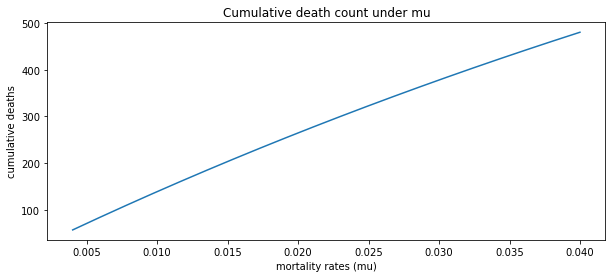

In [36]:
fig = plt.figure(figsize=(10, 4))
#ax = fig.add_axes([0,0,1,1])
plt.plot(mu_points,RIP)
plt.title("Cumulative death count under mu")
plt.xlabel("mortality rates (mu)")
plt.ylabel("cumulative deaths")
# for spine in ("top", "right"):
#     ax.spines[spine].set_visible(False)
plt.show()

### **Other Var Fixed, Changing 𝑅0**

We keep 𝜇 = 0.04

$3 <= \frac{\beta}{\gamma+0.04} <= 4$

- Beta is decided by gamma and R0


- Gamma (0, 1] , R_0 [3, 4]


- Beta = R_0 * (Gamma + 0.04), therefore, beta (0,4]

In [46]:
gamma_points = list(np.linspace(0.01, 1, 10))
R_0_points = list(np.linspace(3, 4, 10))
beta_list = []
df_data = {'R_0':[],
           'Gamma':[],
           'Beta':[],
           'cc_death':[]
}

for r in R_0_points:
    for g in gamma_points:
        beta = r*(g+0.04)
        ret = odeint(deriv_sird, y0, t, args=(N, beta, gamma,0.04))
        S, I, R, D = ret.T 
        cc_death = D[364]
        df_data['R_0'].append(r)
        df_data['Gamma'].append(g)
        df_data['Beta'].append(round(beta,3))
        df_data['cc_death'].append(D[364])

In [48]:
df = pd.DataFrame(df_data)
df

,R_0,Gamma,Beta,cc_death
0,3.0,0.01,0.15,21.178526
1,3.0,0.12,0.48,401.215783
2,3.0,0.23,0.81,480.855261
3,3.0,0.34,1.14,495.563120
4,3.0,0.45,1.47,498.910027
...,...,...,...,...
95,4.0,0.56,2.40,499.977668
96,4.0,0.67,2.84,499.996431
97,4.0,0.78,3.28,499.999429
98,4.0,0.89,3.72,499.999909


In [85]:
df_R0 = df.groupby('R_0').mean()
df_R0

,Gamma,Beta,cc_death
R_0,,,
3.000000,0.505,1.6350,439.735793
3.111111,0.505,1.6956,441.128061
3.222222,0.505,1.7561,442.384705
3.333333,0.505,1.8167,443.528605
3.444444,0.505,1.8772,444.579923
3.555556,0.505,1.9378,445.556791
3.666667,0.505,1.9983,446.475891
3.777778,0.505,2.0589,447.352976
3.888889,0.505,2.1194,448.203319


**Average Cumulative Death over increasing R0**

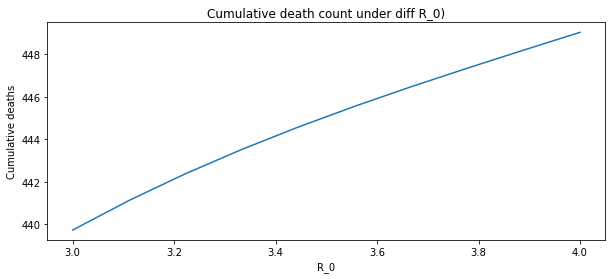

In [91]:
fig = plt.figure(figsize=(10, 4))
#ax = fig.add_axes([0,0,1,1])
plt.plot(R_0_points,df_R0['cc_death'])
plt.title("Cumulative death count under diff R_0)")
plt.xlabel("R_0")
plt.ylabel("Cumulative deaths")
# for spine in ("top", "right"):
#     ax.spines[spine].set_visible(False)
plt.show()

### Plot R_effective

$R_{eff}=R_{0}*\frac{S_{t}}{N}$

In [79]:
## Fixed Var
beta = 0.35
gamma = 0.15
mu = 0.04
R_nought = beta/(mu +gamma)

# time
t = np.linspace(0, 365, 365)
# ODE and Int
def deriv_sird(y, t, N, beta, gamma,mu):
    S, I, R ,D = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mu*I
    dRdt = gamma * I
    dDdt = mu*I
    
    return dSdt, dIdt, dRdt,dDdt

# Initial conditions vector
y0 = S0, I0, R0, D0

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv_sird, y0, t, args=(N, beta, gamma,mu))
S, I, R, D = ret.T 

In [81]:
# R_effective over time
R_eff_list = []
for s in S:
    R_eff = R_nought * s/N
    R_eff_list.append(R_eff)

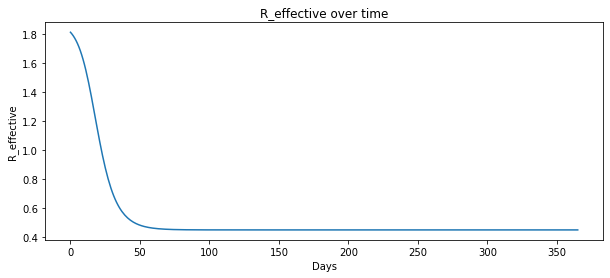

In [82]:
fig = plt.figure(figsize=(10, 4))
#ax = fig.add_axes([0,0,1,1])
plt.plot(t,R_eff_list)
plt.title("R_effective over time")
plt.xlabel("Days")
plt.ylabel("R_effective")
# for spine in ("top", "right"):
#     ax.spines[spine].set_visible(False)
plt.show()

## Lockdown

### Hard lockdown

- We assume on Day: L, a strict lockdown is imposed
    
- Before lockdown, R_0 = 4, the lockdown pushes R_0 to 0.9

In [73]:
L = 50
N = 3000
beta = 0.35
mu = 0.04

def deriv_hard(y, t, N, beta,gamma,mu):
    S, I, R ,D = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mu*I
    dRdt = gamma * I
    dDdt = mu*I
    return dSdt, dIdt, dRdt,dDdt

def R_0(t):
    return 4.0 if t < L else 0.9
def gamma(t):
    return (beta / R_0(t)) - mu

S0,I0,R0,D0 = N-50, 50, 0, 0 

t = np.linspace(0, 365, 365)
y0 = S0, I0, R0, D0

ret = odeint(deriv_hard, y0, t, args=(N, beta, gamma,mu))
S, I, R, D = ret.T 

In [75]:
R_0(5),R_0(51)

(4.0, 0.9)

In [76]:
def plot_hard(t, S, I, R, D):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S/N, 'b', alpha=0.7, linewidth=2, label='Susceptible%')
    ax.plot(t, I/N, 'r', alpha=0.7, linewidth=2, label='Infected%')
    ax.plot(t, R/N, 'g', alpha=0.7, linewidth=2, label='Recovered%')
    ax.plot(t, D/N, 'k', alpha=0.7, linewidth=2, label='Dead%')
    #ax.plot(t, R_nought_sird*S/N, "gray", alpha=0.5, lw=2, label="R_effective")
    #ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
    ax.set_xlabel('Time (days)')
    ax.set_ylabel('% of Compartment / R_effective')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    
    #ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.title("Lockdown after {} days".format(L))
    plt.show()

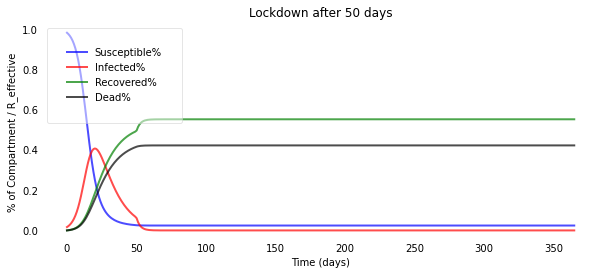

In [77]:
plot_hard(t, S, I, R, D)